<a href="https://colab.research.google.com/github/WengGeyu/NMA-DL/blob/main/data_to_nnUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks')
#!git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd nnUNet
!pip install -e .
!pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

In [ ]:
from batchgenerators.utilities.file_and_folder_operations import *
import shutil
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json
from nnunetv2.paths import nnUNet_raw

def convert_aneurysm(kits_base_dir: str, nnunet_dataset_id: int = 333):
    task_name = "aneurysm"

    foldername = "Dataset%03.0d_%s" % (nnunet_dataset_id, task_name)

    # setting up nnU-Net folders
    out_base = join('/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw', foldername)
    imagestr = join(out_base, "imagesTr")
    labelstr = join(out_base, "labelsTr")
    testing
    maybe_mkdir_p(imagestr)
    maybe_mkdir_p(labelstr)

    cases = subdirs(kits_base_dir, prefix='sub_', join=False)
    for tr in cases:
        shutil.copy(join(kits_base_dir, tr, 'angio.nii.gz'), join(imagestr, f'{tr}_0000.nii.gz'))
        shutil.copy(join(kits_base_dir, tr, 'Lesion_1_mask.nii.gz'), join(labelstr, f'{tr}.nii.gz'))

    generate_dataset_json(out_base, {0: "TOF"},
                          labels={
                              "background": 0,
                              "aneurysm": 1
                          },
                          num_training_cases=len(cases), file_ending='.nii.gz')

convert_aneurysm('/content/drive/MyDrive/ColabNotebooks/temp_data', 333)

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_plan_and_preprocess -d 666 --verify_dataset_integrity

Training

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_train 666 3d_lowres 0 -tr nnUNetTrainer_10epochs --c

Predicting

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_predict -i "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/imagesTr" -o "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__2d/fold_0/predTs" -d 666 -c 2d -device cuda -f 0
# -chk checkpoint_best.pth

Visualization

In [63]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.transforms as mtran

test_path = "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/imagesTr"
pred_path = "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__2d/fold_0/predTs"
test_filename = os.path.join(test_path,'sub_013_0000.nii.gz')
pred_filename = os.path.join(pred_path,'sub_013.nii.gz')
test_obj = nib.load(test_filename)
pred_obj = nib.load(pred_filename)
# Extract data as numpy ndarray
test_data = test_obj.get_fdata()
pred_data = pred_obj.get_fdata()
# Get the image shape
# height, width, depth = pred_data.shape
# print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}")


Plotting Layer 73 of Image


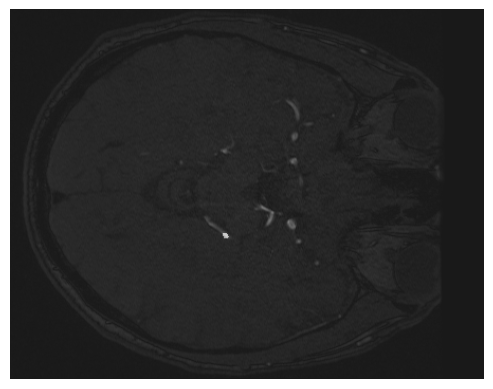

In [76]:
# Select random layer number
pred = np.asarray(np.nonzero(pred_data))
i = pred[2, np.random.randint(0, np.size(pred,1))]
# Define a channel to look at
print(f"Plotting Layer {i} of Image")
plt.imshow(test_data[:, :, i], cmap='gray', alpha=0.8)
plt.imshow(pred_data[:, :, i], cmap='gray', alpha=0.5)
plt.axis('off');